<a href="https://colab.research.google.com/github/DylanDabrowski/AI-Final-Project/blob/main/AI_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

from pycaret.utils import enable_colab
enable_colab()

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=["Sex", "Length", "Diameter", "Height", "While weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"], header=None)
dataset

,Sex,Length,Diameter,Height,While weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
dataset.shape

(4177, 9)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3759, 9)
Unseen Data For Predictions: (418, 9)


In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Rings', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Rings
2,Original Data,"(3759, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2631, 10)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Rings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.5672,4.7734,2.1816,0.5344,0.1792,0.1581,0.017
lr,Linear Regression,1.5675,4.7756,2.1821,0.5340,0.1792,0.1582,0.601
lar,Least Angle Regression,1.5674,4.7754,2.1821,0.5340,0.1792,0.1581,0.021
gbr,Gradient Boosting Regressor,1.5275,4.7939,2.1861,0.5340,0.1755,0.1521,0.283
rf,Random Forest Regressor,1.5457,4.7909,2.1862,0.5337,0.1756,0.1538,0.796
ridge,Ridge Regression,1.5743,4.8309,2.1946,0.5302,0.1834,0.1593,0.016
et,Extra Trees Regressor,1.5624,4.8663,2.2031,0.5264,0.1767,0.1554,0.436
huber,Huber Regressor,1.5379,4.8870,2.2071,0.5247,0.1790,0.1500,0.084
lightgbm,Light Gradient Boosting Machine,1.5524,4.9304,2.2176,0.5188,0.1777,0.1539,0.149
knn,K Neighbors Regressor,1.5800,5.1345,2.2607,0.5035,0.1814,0.1549,0.024


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1457,6.7583,2.5997,0.1994,0.2191,0.2280
1,2.5245,8.7098,2.9512,0.2791,0.2627,0.2930
2,2.2285,7.7707,2.7876,0.3257,0.2331,0.2452
3,2.4003,7.7875,2.7906,0.2083,0.2480,0.2745
4,2.3260,7.4896,2.7367,0.1782,0.2379,0.2566
5,2.4748,8.4307,2.9036,0.0987,0.2521,0.2785
6,2.2290,7.3092,2.7036,0.3708,0.2312,0.2423
7,2.2281,7.3723,2.7152,0.1919,0.2326,0.2467
8,2.3755,8.1288,2.8511,0.3189,0.2599,0.2849


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5821,4.8778,2.2086,0.4222,0.1783,0.1560
1,1.5301,4.9298,2.2203,0.5920,0.1777,0.1524
2,1.5040,4.9146,2.2169,0.5735,0.1684,0.1471
3,1.4532,4.1121,2.0278,0.5819,0.1642,0.1474
4,1.5831,5.0276,2.2422,0.4484,0.1816,0.1548
5,1.4843,4.1404,2.0348,0.5573,0.1683,0.1505
6,1.6519,5.9131,2.4317,0.4910,0.1874,0.1566
7,1.4915,4.9177,2.2176,0.4610,0.1774,0.1473
8,1.6403,5.2939,2.3009,0.5565,0.1926,0.1706


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0644,9.1780,3.0295,-0.0872,0.2372,0.2066
1,1.8441,7.3346,2.7082,0.3929,0.2208,0.1819
2,2.0570,7.8973,2.8102,0.3147,0.2247,0.2006
3,1.9848,8.3194,2.8843,0.1542,0.2306,0.2002
4,2.1065,9.1635,3.0271,-0.0054,0.2402,0.2058
5,1.8669,6.8327,2.6139,0.2695,0.2150,0.1866
6,2.2814,10.5703,3.2512,0.0901,0.2584,0.2154
7,2.1331,10.1635,3.1880,-0.1140,0.2556,0.2127
8,2.1065,8.8441,2.9739,0.2590,0.2366,0.2119


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7974,5.5432,2.3544,0.3434,0.1938,0.1817
1,1.8668,6.1535,2.4806,0.4907,0.2043,0.1965
2,1.8021,6.6144,2.5718,0.4260,0.2010,0.1847
3,1.6940,4.7621,2.1822,0.5159,0.1885,0.1811
4,1.7673,5.2423,2.2896,0.4248,0.1910,0.1793
5,1.8046,5.3843,2.3204,0.4244,0.1939,0.1884
6,1.8273,5.9256,2.4343,0.4899,0.1970,0.1823
7,1.7514,5.4298,2.3302,0.4048,0.1944,0.1816
8,1.8786,6.2342,2.4968,0.4777,0.2131,0.2030


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=90, random_state=123)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [ ]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6367,5.0701,2.2517,0.3994,0.1827,0.1618
1,1.5400,4.9862,2.2330,0.5873,0.1784,0.1532
2,1.5765,5.2828,2.2984,0.5416,0.1776,0.1554
3,1.4923,4.0621,2.0155,0.5870,0.1660,0.1514
4,1.6731,5.2478,2.2908,0.4242,0.1870,0.1649
5,1.5764,4.4838,2.1175,0.5206,0.1784,0.1617
6,1.7507,6.3863,2.5271,0.4503,0.1986,0.1662
7,1.5499,5.1307,2.2651,0.4376,0.1844,0.1545
8,1.7651,5.9580,2.4409,0.5008,0.2052,0.1846


INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 12
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5852,5.1297,2.2649,0.3923,0.1848,0.1533
1,1.6160,6.2928,2.5085,0.4792,0.2005,0.1570
2,1.6844,7.0589,2.6569,0.3874,0.2016,0.1578
3,1.5019,4.7947,2.1897,0.5126,0.1792,0.1485
4,1.5285,4.9582,2.2267,0.4560,0.1792,0.1440
5,1.4943,5.2452,2.2903,0.4392,0.1837,0.1468
6,1.5779,5.7452,2.3969,0.5055,0.1898,0.1463
7,1.4924,5.3356,2.3099,0.4152,0.1882,0.1408
8,1.7871,7.0323,2.6519,0.4108,0.2202,0.1817


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 13
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


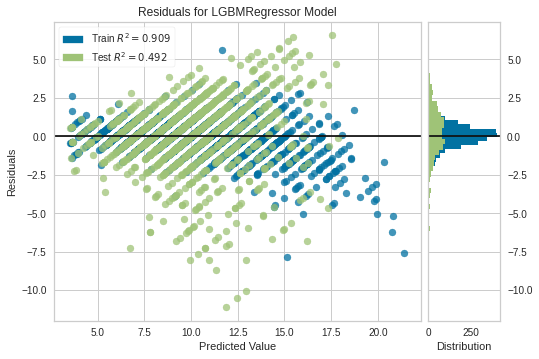

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm)

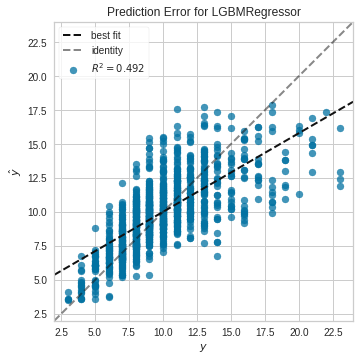

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

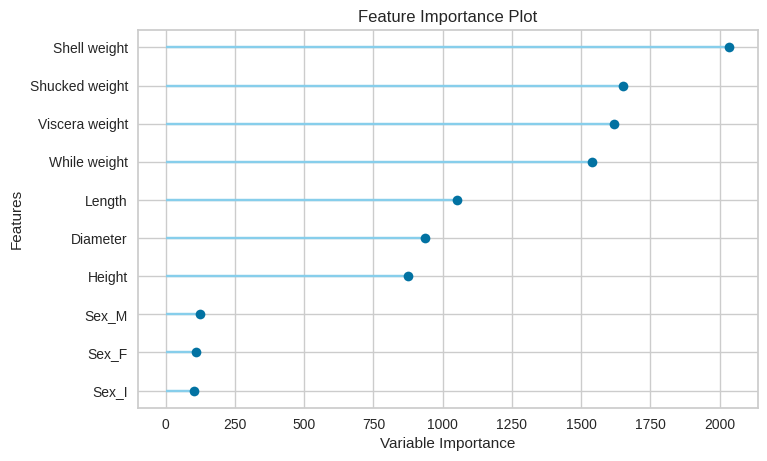

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.6241,5.0382,2.2446,0.4921,0.1846,0.1627


In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)
print(final_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=1

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
predict_model(final_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.6986,0.9233,0.9609,0.9069,0.0859,0.0737


In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.7103,5.7886,2.406,0.5053,0.1931,0.1661


,Sex,Length,Diameter,Height,While weight,Shucked weight,Viscera weight,Shell weight,Rings,Label
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,8.921396
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,8.419305
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,11.872035
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,9.785368
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,9.932212


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Rings, unseen_predictions.Label, 'R2')

0.5053

In [ ]:
save_model(final_lightgbm,'Final LightGBM Model 30Nov2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=Final LightGBM Model 30Nov2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Rings',
                                      time_features=[])),
                ('impute

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Rings',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [ ]:
saved_final_lightgbm = load_model('Final LightGBM Model 30Nov2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final LightGBM Model 30Nov2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Rings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                 LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=1.0, importance_type='split',
                               learning_rate=0.1, max_depth=60,
                               min_chi

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.7103,5.7886,2.406,0.5053,0.1931,0.1661


In [ ]:
new_prediction.head()

,Sex,Length,Diameter,Height,While weight,Shucked weight,Viscera weight,Shell weight,Rings,Label
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,8.921396
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,8.419305
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,11.872035
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,9.785368
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,9.932212


In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction.Rings, new_prediction.Label, 'R2')

0.5053